# 텍스트 유사도 
## Quora Question Pairs

In [2]:
import zipfile

zf = zipfile.ZipFile('./quora-question-pairs.zip')
zf.extractall('../data_in/')
zf.close()

In [3]:
import os

os.listdir('../data_in/')

['.ipynb_checkpoints',
 'data_configs.json',
 'labeledTrainData.tsv',
 'NanumGothic.ttf',
 'nsmc_test_input.npy',
 'nsmc_test_label.npy',
 'nsmc_train_input.npy',
 'nsmc_train_label.npy',
 'ratings.txt',
 'ratings_test.txt',
 'ratings_train.txt',
 'sampleSubmission.csv',
 'sample_submission.csv.zip',
 'test.csv',
 'test.csv.zip',
 'testData.tsv',
 'test_clean.csv',
 'test_id.npy',
 'test_input.npy',
 'train.csv.zip',
 'train_clean.csv',
 'train_input.npy',
 'train_label.npy',
 'unlabeledTrainData.tsv']

In [4]:
for i in os.listdir('../data_in'):
    if i.endswith('.zip'):
        zf = zipfile.ZipFile('../data_in/'+i)
        zf.extractall('./data_in/')
        zf.close()
        os.remove('../data_in/'+i)

In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
DATA_IN_PATH = './data_in/'

train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [8]:
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH+file)/1000000, 2))+"MB")

파일 크기 : 
sample_submission.csv         22.35MB
test.csv                      477.59MB
train.csv                     63.4MB


In [9]:
print("전체 학습 데이터 개수: {}".format(len(train_data)))

전체 학습 데이터 개수: 404290


In [10]:
train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
train_set.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [13]:
len(train_set)

808580

In [17]:
print("교육 데이터의 총 질문 수: {}".format(len(np.unique(train_set))))
print("반복해서 나타나는 질문의 수: {}".format(np.sum(train_set.value_counts() > 1)))

교육 데이터의 총 질문 수: 537361
반복해서 나타나는 질문의 수: 111873


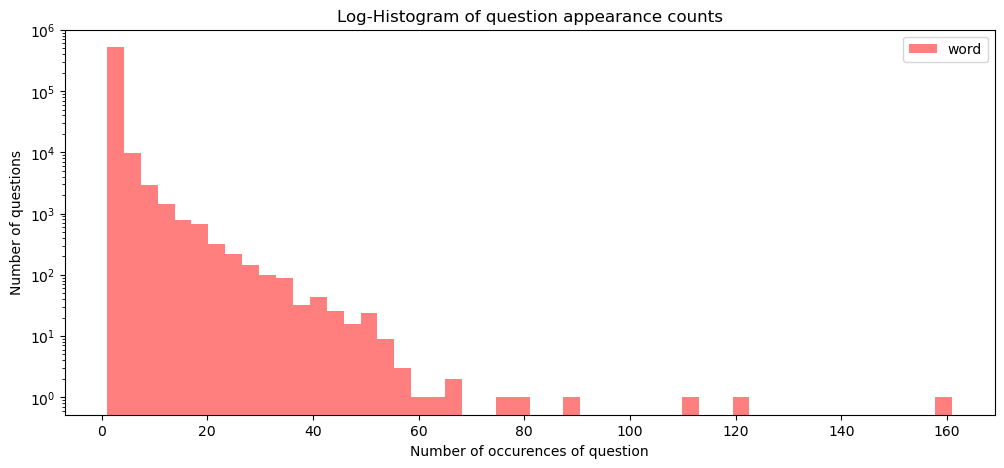

In [18]:
plt.figure(figsize=(12,5))
plt.hist(train_set.value_counts(),bins=50,
         alpha=0.5,color='r',label='word')
# alpha: 그래프 색상 투명도
# range: x축 값 범위
plt.yscale('log',nonpositive='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel("Number of questions")
plt.legend()
plt.show()

빈도가 1, 즉 1개만 존재하는 질문들이 가장 많음. (100,000개 이상)

빈도가 160, 즉 160번 중복되는 질문이 하나 있음. 

In [19]:
train_set.value_counts()

What are the best ways to lose weight?                                                    161
How can you look at someone's private Instagram account without following them?           120
How can I lose weight quickly?                                                            111
What's the easiest way to make money online?                                               88
Can you see who views your Instagram?                                                      79
                                                                                         ... 
Should I buy my iPhone from the Apple Store or from my cellphone service provider?          1
How much do toucans eat in a day? What do they eat?                                         1
Is it a logical move for Kiip.me to grow their business on the Mountain Lion platform?      1
Is Hla b27 curable?                                                                         1
What is it like to have sex with your cousin?               

In [20]:
type(train_set.value_counts())

pandas.core.series.Series

In [22]:
print("중복 최대 개수: {}".format(np.max(train_set.value_counts())))
print("중복 최소 개수: {}".format(np.min(train_set.value_counts())))
print("중복 평균 개수: {}".format(np.mean(train_set.value_counts())))
print("중복 표준편차: {}".format(np.std(train_set.value_counts())))
print("중복 중앙값: {}".format(np.median(train_set.value_counts())))

print("제1사분위 중복: {}".format(np.percentile(train_set.value_counts(), 25)))
print("제3사분위 중복: {}".format(np.percentile(train_set.value_counts(), 75)))     

중복 최대 개수: 161
중복 최소 개수: 1
중복 평균 개수: 1.50472401234924
중복 표준편차: 1.9114373539452214
중복 중앙값: 1.0
제1사분위 중복: 1.0
제3사분위 중복: 1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x21601d8c188>,
 'caps': [<matplotlib.lines.Line2D at 0x21601d8c048>,
 'boxes': [<matplotlib.lines.Line2D at 0x21601d85ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x21601d93448>],
 'fliers': [<matplotlib.lines.Line2D at 0x21601d8ca48>],
 'means': [<matplotlib.lines.Line2D at 0x21601d93908>]}

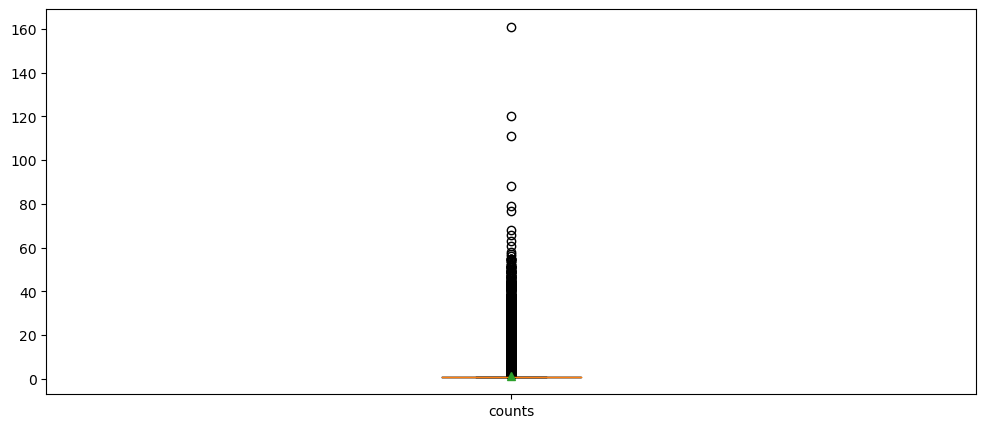

In [24]:
plt.figure(figsize=(12,5))
plt.boxplot([train_set.value_counts()],
           labels=['counts'],
           showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

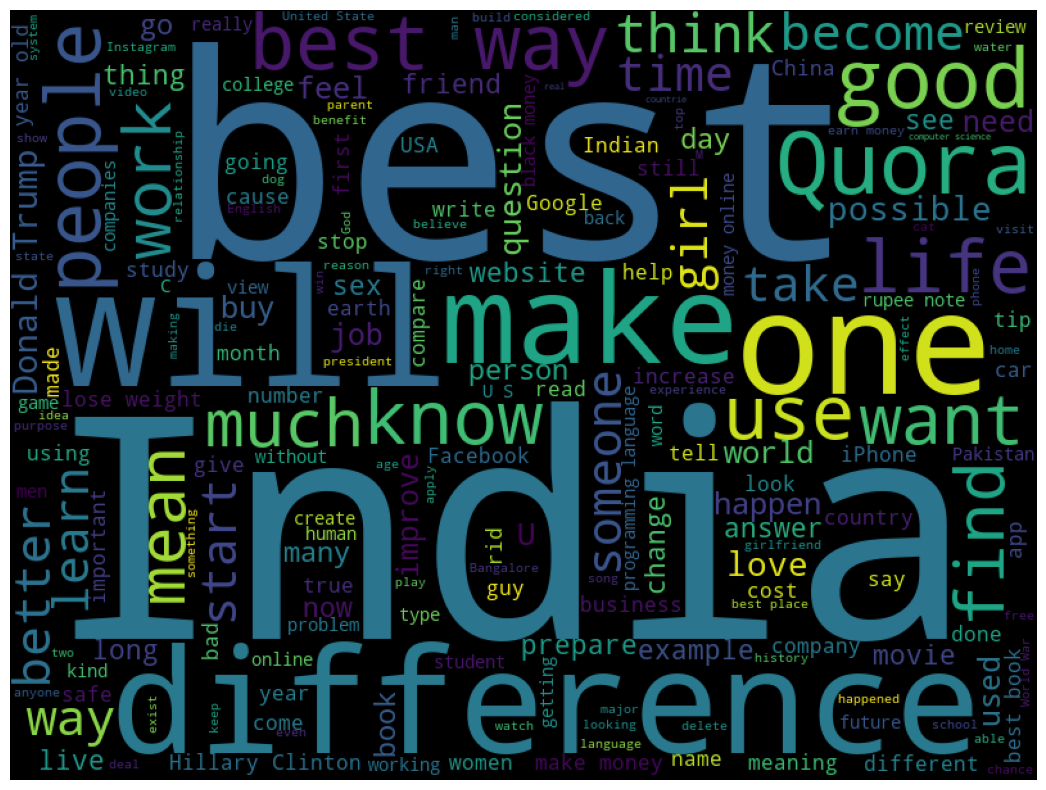

In [25]:
from wordcloud import WordCloud

cloud = WordCloud(width=800, height=600).generate(' '.join(train_set.astype(str)))
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')

In [31]:
' '.join(train_set.astype(str))[:100]

'What is the step by step guide to invest in share market in india? What is the story of Kohinoor (Ko'

C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='is_duplicate', ylabel='count'>

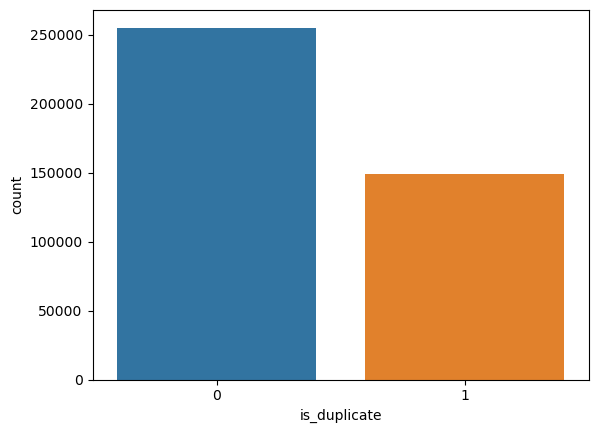

In [26]:
# fig, axe = plt.subplots(ncols=1)
# fig.set_size_inches(6,3)
sns.countplot(train_data['is_duplicate'])

Text(0.5, 1.0, 'Normalised hostogram of character count in questions')

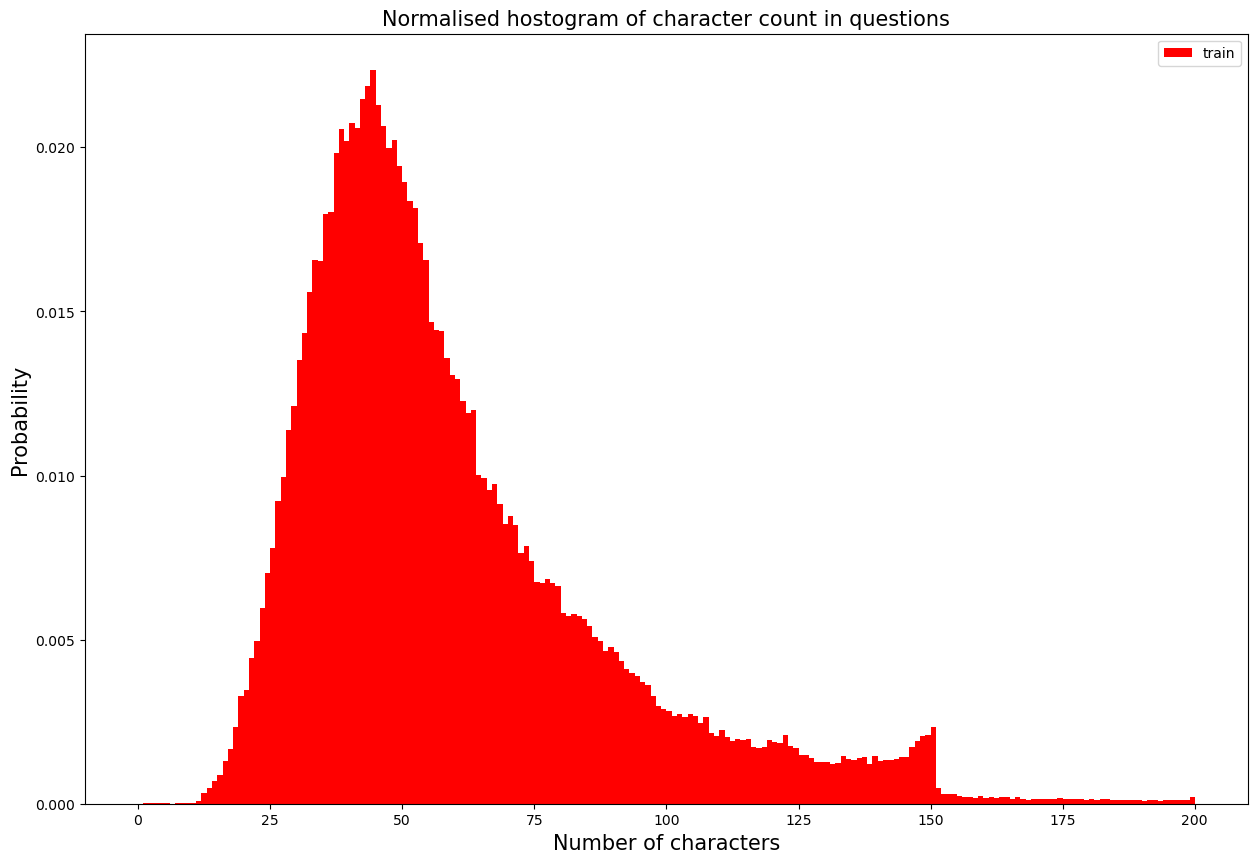

In [32]:
train_length = train_set.apply(len)

plt.figure(figsize=(15,10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r',
        density=True, label='train')
# density=True: 확률밀도그래프 반환
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.title('Normalised hostogram of character count in questions',
         fontsize=15)

In [33]:
train_length

0          66
1          51
2          73
3          50
4          76
         ... 
808575     79
808576     42
808577     17
808578    127
808579     45
Length: 808580, dtype: int64

Text(0.5, 1.0, 'Normalised hostogram of character count in questions')

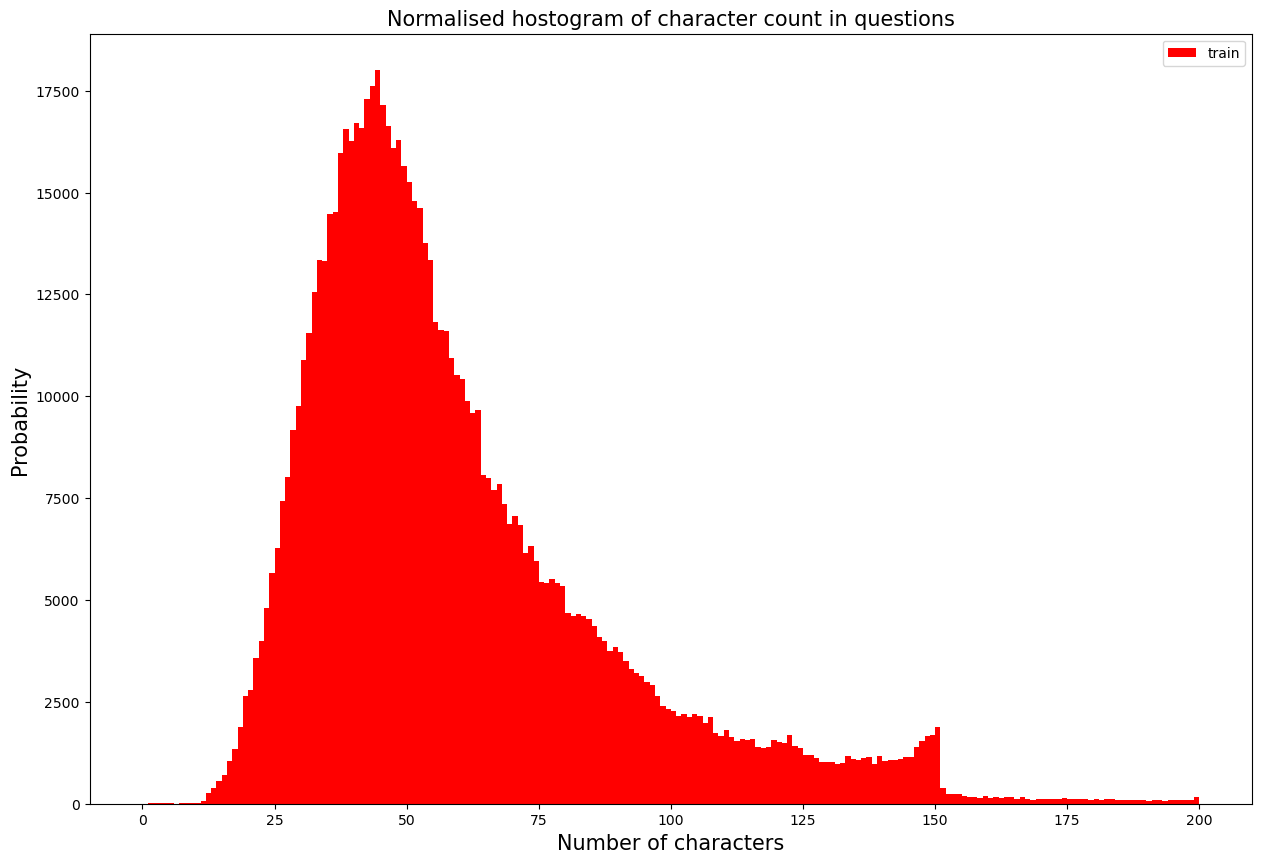

In [34]:
plt.figure(figsize=(15,10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r',
        label='train')
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.title('Normalised hostogram of character count in questions',
         fontsize=15)

In [35]:
print('질문 길이 최대 값: {}'.format(np.max(train_length)))
print('질문 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('질문 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('질문 길이 중간 값: {}'.format(np.median(train_length)))
print('질문 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('질문 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

질문 길이 최대 값: 1169
질문 길이 평균 값: 59.82
질문 길이 표준편차: 31.96
질문 길이 중간 값: 51.0
질문 길이 제 1 사분위: 39.0
질문 길이 제 3 사분위: 72.0


{'whiskers': [<matplotlib.lines.Line2D at 0x216021c8d88>,
 'caps': [<matplotlib.lines.Line2D at 0x216021c8888>,
 'boxes': [<matplotlib.lines.Line2D at 0x216021c12c8>],
 'medians': [<matplotlib.lines.Line2D at 0x216021c9548>],
 'fliers': [<matplotlib.lines.Line2D at 0x216021c8808>],
 'means': [<matplotlib.lines.Line2D at 0x216021c9f08>]}

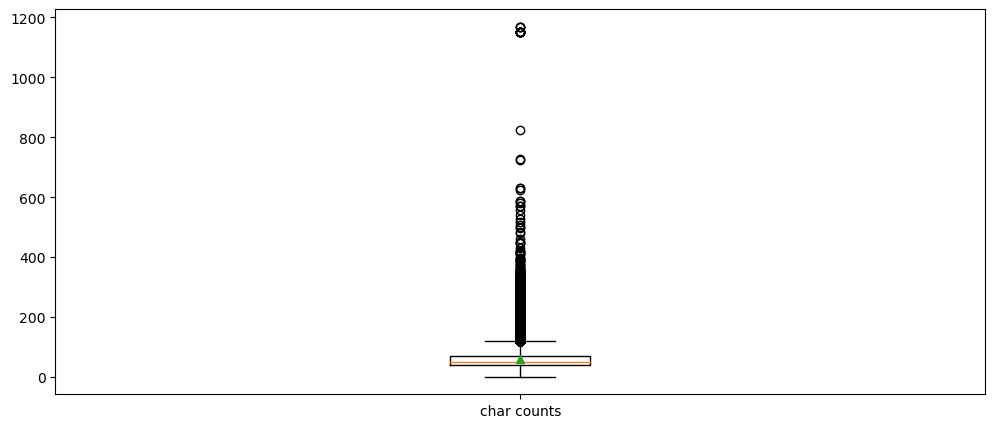

In [36]:
plt.figure(figsize=(12,5))
plt.boxplot(train_length,
           labels=['char counts'],
           showmeans=True)

Text(0, 0.5, 'Probability')

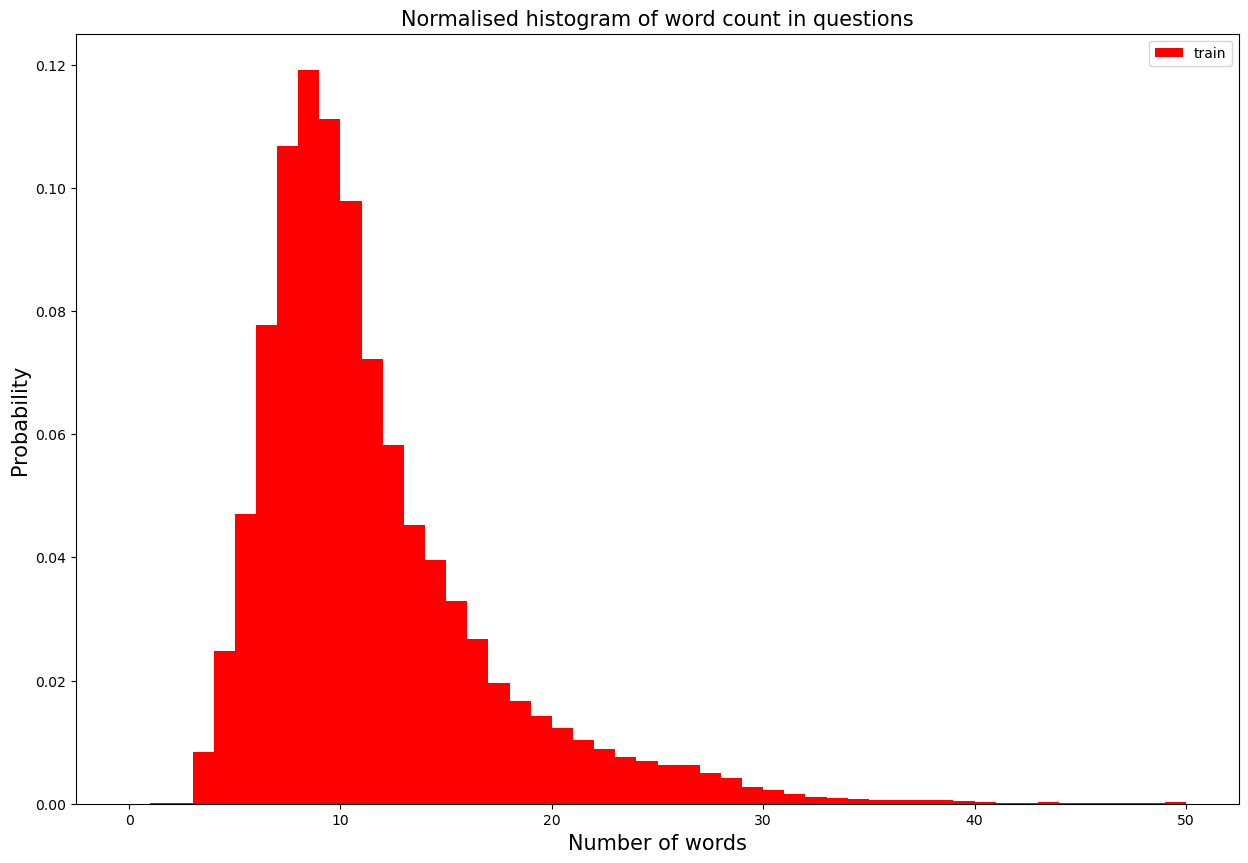

In [38]:
train_word_counts = train_set.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15,10))
plt.hist(train_word_counts, bins=50, range=[0,50], facecolor='r',
        density=True, label='train')
plt.title("Normalised histogram of word count in questions", fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [39]:
print('질문 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('질문 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('질문 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('질문 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('질문 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('질문 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('질문 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('질문 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

질문 단어 개수 최대 값: 237
질문 단어 개수 최소 값: 1
질문 단어 개수 평균 값: 11.06
질문 단어 개수 표준편차: 5.89
질문 단어 개수 중간 값: 10.0
질문 단어 개수 제 1 사분위: 7.0
질문 단어 개수 제 3 사분위: 13.0
질문 단어 개수 99 퍼센트: 31.0


{'whiskers': [<matplotlib.lines.Line2D at 0x216010a1d48>,
 'caps': [<matplotlib.lines.Line2D at 0x216010999c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x216010a1408>],
 'medians': [<matplotlib.lines.Line2D at 0x216010aa0c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x216010aa148>],
 'means': [<matplotlib.lines.Line2D at 0x216010aa448>]}

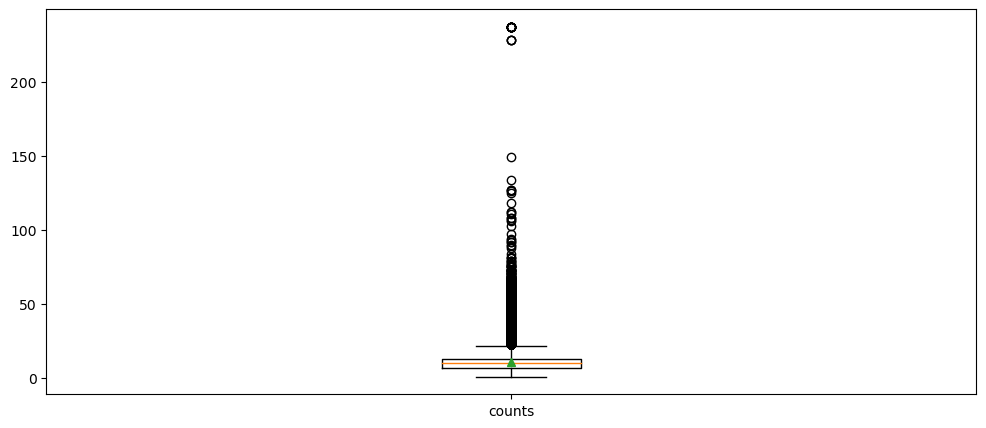

In [40]:
plt.figure(figsize=(12,5))
plt.boxplot(train_word_counts,
           labels=['counts'],
           showmeans=True)

In [41]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x))
math = np.mean(train_set.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_set.apply(lambda x: '.' in x))
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x])))

print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('수학 태그가있는 질문: {:.2f}%'.format(math * 100))
print('마침표를 포함한 질문: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가있는 질문: {:.2f}%'.format(numbers * 100))

물음표가있는 질문: 99.87%
수학 태그가있는 질문: 0.12%
마침표를 포함한 질문: 6.31%
첫 글자가 대문자 인 질문: 99.81%
대문자가있는 질문: 99.95%
숫자가있는 질문: 11.83%


## 데이터 전처리

In [42]:
import pandas as pd 
import numpy as np
import re
import json

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [43]:
DATA_IN_PATH = './data_in/'
FILTERS = "([~.,!?\"':;)(])"
MAX_SEQUENCE_LENGTH = 31

change_filter = re.compile(FILTERS)

train_data = pd.read_csv(DATA_IN_PATH + 'train.csv', encoding='utf8')

train_pos_data = train_data.loc[train_data['is_duplicate']==1]
train_neg_data = train_data.loc[train_data['is_duplicate']==0]

class_difference = len(train_neg_data) - len(train_pos_data)
# 105764 개 duplicate 유무 차이 
sample_frac = 1 - (class_difference / len(train_neg_data))
# 0.5852831268846044

train_neg_data = train_neg_data.sample(frac=sample_frac)
# frac: 추출할 비율 설정 (추출개수 n과 함께 사용 불가)
# 원래 비중복 데이터가 더 많았는데, 개수 같아지도록 샘플링

print("중복 질문 개수: {}".format(len(train_pos_data)))
print("중복 아닌 질문 개수: {}".format(len(train_neg_data)))

중복 질문 개수: 149263
중복 아닌 질문 개수: 149263


In [47]:
train_neg_data

,id,qid1,qid2,question1,question2,is_duplicate
312953,312953,437479,437480,Where do you find Isabela in Dragon Age 2?,How do you obtain Companion Armor in Dragon Ag...,0
35615,35615,65050,65051,Who cursed Krishna?,What/Who is Krishna?,0
154822,154822,207144,242677,Shall demonetization of Rs 500 & 1000 stop cor...,What is the total currency amount of 500 and 1...,0
280515,280515,400105,400106,What do you think the functions of the prison?,Do you like Chinese animation?,0
245260,245260,68643,318516,Is genius a trait you are born with or acquired?,Can anybody become a genius?,0
...,...,...,...,...,...,...
355062,355062,244372,73963,Is there a shortcut key for switching between ...,What is the keyboard shortcut to switch betwee...,0
46405,46405,83015,83016,What is Faith Daniels doing now?,Have you been religious and lost your faith? H...,0
374763,374763,505691,505692,"While performing rituals named ""Munja"" in Brah...",Why is deer skin allowed while performing Hind...,0
279326,279326,398741,398742,What are the best things to do when you don't ...,What is the best thing to do when your girlfri...,0


In [48]:
train_data = pd.concat([train_neg_data, train_pos_data])
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
312953,312953,437479,437480,Where do you find Isabela in Dragon Age 2?,How do you obtain Companion Armor in Dragon Ag...,0
35615,35615,65050,65051,Who cursed Krishna?,What/Who is Krishna?,0
154822,154822,207144,242677,Shall demonetization of Rs 500 & 1000 stop cor...,What is the total currency amount of 500 and 1...,0
280515,280515,400105,400106,What do you think the functions of the prison?,Do you like Chinese animation?,0
245260,245260,68643,318516,Is genius a trait you are born with or acquired?,Can anybody become a genius?,0


In [49]:
train_data.tail()

,id,qid1,qid2,question1,question2,is_duplicate
404280,404280,537922,537923,What are some outfit ideas to wear to a frat p...,What are some outfit ideas wear to a frat them...,1
404281,404281,99131,81495,Why is Manaphy childish in Pokémon Ranger and ...,Why is Manaphy annoying in Pokemon ranger and ...,1
404282,404282,1931,16773,How does a long distance relationship work?,How are long distance relationships maintained?,1
404284,404284,537926,537927,What does Jainism say about homosexuality?,What does Jainism say about Gays and Homosexua...,1
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1


In [50]:
change_filter = re.compile(FILTERS)

questions1 = [str(s) for s in train_data['question1']]
questions2 = [str(s) for s in train_data['question2']]

filtered_questions1 = list()
filtered_questions2 = list()

for q in questions1:
    filtered_questions1.append(re.sub(change_filter,'',q).lower())
    
for q in questions2:
    filtered_questions2.append(re.sub(change_filter,'',q).lower())
    
print(filtered_questions1[:2])
print(filtered_questions2[:2])

['where do you find isabela in dragon age 2', 'who cursed krishna']
['how do you obtain companion armor in dragon age 2', 'what/who is krishna']


In [51]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(filtered_questions1 + filtered_questions2)

questions1_sequence = tokenizer.texts_to_sequences(filtered_questions1)
questions2_sequence = tokenizer.texts_to_sequences(filtered_questions2)

q1_data = pad_sequences(questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
q2_data = pad_sequences(questions2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

word_vocab = {}
word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0

labels = np.array(train_data['is_duplicate'], dtype=int)

print("Shape of question1 data: {}".format(q1_data.shape))
print("Shape of question2 data: {}".format(q2_data.shape))
print("Shape of label: {}".format(labels.shape))
print("Words in index: {}".format(len(word_vocab)))

Shape of question1 data: (298526, 31)
Shape of question2 data: (298526, 31)
Shape of label: (298526,)
Words in index: 76599


In [52]:
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

TRAIN_Q1_DATA = 'train_q1.npy'
TRAIN_Q2_DATA = 'train_q2.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

np.save(open(DATA_IN_PATH + TRAIN_Q1_DATA, 'wb'), q1_data)
np.save(open(DATA_IN_PATH + TRAIN_Q2_DATA, 'wb'), q2_data)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), labels)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))

In [53]:
test_data = pd.read_csv(DATA_IN_PATH + 'test.csv', encoding='utf8')
valid_ids = [type(x)==int for x in test_data.test_id]
test_data = test_data[valid_ids].drop_duplicates()

C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
test_questions1 = [str(s) for s in test_data['question1']]
test_questions2 = [str(s) for s in test_data['question2']]

filtered_test_questions1 = list()
filtered_test_questions2 = list()

for q in test_questions1:
     filtered_test_questions1.append(re.sub(change_filter, "", q).lower())
        
for q in test_questions2:
     filtered_test_questions2.append(re.sub(change_filter, "", q).lower())
        
test_questions1_sequence = tokenizer.texts_to_sequences(filtered_test_questions1)
test_questions2_sequence = tokenizer.texts_to_sequences(filtered_test_questions2)

test_q1_data = pad_sequences(test_questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_q2_data = pad_sequences(test_questions2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

test_id = np.array(test_data['test_id'])

print('Shape of question1 data: {}'.format(test_q1_data.shape))
print('Shape of question2 data:{}'.format(test_q2_data.shape))
print('Shape of ids: {}'.format(test_id.shape))

TEST_Q1_DATA = 'test_q1.npy'
TEST_Q2_DATA = 'test_q2.npy'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_Q1_DATA, 'wb'), test_q1_data)
np.save(open(DATA_IN_PATH + TEST_Q2_DATA , 'wb'), test_q2_data)
np.save(open(DATA_IN_PATH + TEST_ID_DATA , 'wb'), test_id)